Project Root: /home/idacy/development/sparse_autoencoder_tutorial
src Path: /home/idacy/development/sparse_autoencoder_tutorial/src
Attempting to load data from: /home/idacy/development/sparse_autoencoder_tutorial/data/sample_activations.pt
Original Data Sample: tensor([0.1119, 0.5329, 0.2143, 0.4748, 0.4639, 0.2450, 0.2864, 0.4746, 0.6867,
        0.3998, 0.6680, 0.3791, 0.3823, 0.6774, 0.0295, 0.5095, 0.3972, 0.6418,
        0.4896, 0.5081, 0.4950, 0.7445, 0.9935, 0.8762, 0.9575, 0.5826, 0.6502,
        0.8027, 0.0740, 0.6273, 0.7088, 0.2484, 0.2746, 0.0616, 0.0825, 0.6856,
        0.0021, 0.6531, 0.7067, 0.3498, 0.7025, 0.6475, 0.0315, 0.9820, 0.9719,
        0.8703, 0.8294, 0.8544, 0.3164, 0.3652, 0.4419, 0.6530, 0.9780, 0.4077,
        0.6104, 0.6253, 0.6890, 0.5246, 0.9788, 0.3672, 0.0893, 0.3632, 0.3625,
        0.3815, 0.3588, 0.2691, 0.7649, 0.9665, 0.9543, 0.4685, 0.7041, 0.4596,
        0.6256, 0.1676, 0.4415, 0.7495, 0.3358, 0.4453, 0.8662, 0.6463, 0.1091,
        0.6241, 0

/home/idacy/development/sparse_autoencoder_tutorial/src/utils.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(full_filepath)
/tmp/ipykernel_17466/3330

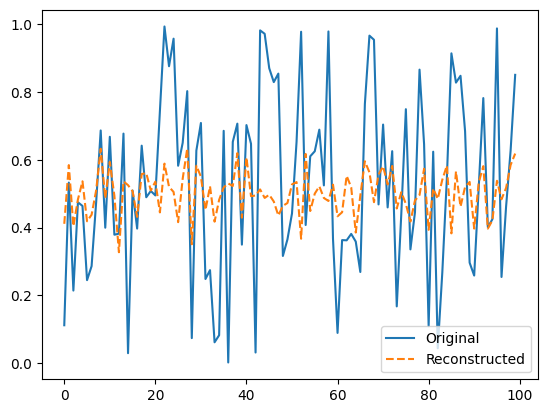

In [12]:
import sys
import os
import importlib.util
import matplotlib.pyplot as plt
import torch

# Set the project root and src path based on the directory structure
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
src_path = os.path.join(project_root, "src")

# Debugging: Print project and src paths to ensure they are correct
print("Project Root:", project_root)
print("src Path:", src_path)

# Load the 'autoencoder.py' and 'utils.py' as modules directly
def load_module(module_name, file_path):
    spec = importlib.util.spec_from_file_location(module_name, file_path)
    module = importlib.util.module_from_spec(spec)
    sys.modules[module_name] = module
    spec.loader.exec_module(module)
    return module

# Load SparseAutoencoder and load_data functions directly
autoencoder_module = load_module("autoencoder", os.path.join(src_path, "autoencoder.py"))
utils_module = load_module("utils", os.path.join(src_path, "utils.py"))

# Import required classes and functions from the loaded modules
SparseAutoencoder = autoencoder_module.SparseAutoencoder
load_data = utils_module.load_data

# Load data and trained model
data = load_data()
model = SparseAutoencoder()
model.load_state_dict(torch.load(os.path.join(project_root, "sparse_autoencoder.pth")))

# Forward pass to visualize the sparse activations
encoded, reconstructed = model(data)
print("Original Data Sample:", data[0])
print("Encoded Representation Sample:", encoded[0])
print("Reconstructed Data Sample:", reconstructed[0])

# Plotting the difference between original and reconstructed data
import matplotlib.pyplot as plt

plt.plot(data[0].detach().numpy(), label="Original")
plt.plot(reconstructed[0].detach().numpy(), label="Reconstructed", linestyle='--')
plt.legend()
plt.show()
